LOLZ [[-0.09214266 -0.09438378 -0.09678266 ... -0.17902195 -0.17802785
  -0.17706555]
 [-0.09433056 -0.0967681  -0.09930615 ... -0.17961998 -0.1784638
  -0.17760332]
 [-0.09692565 -0.09952729 -0.10214002 ... -0.18014035 -0.17902535
  -0.17839138]
 ...
 [ 0.13803937  0.13959482  0.14102831 ...  0.02840878  0.02729335
   0.0261397 ]
 [ 0.13873066  0.14036663  0.14205319 ...  0.02883724  0.0276122
   0.02634582]
 [ 0.13940829  0.14139609  0.14341986 ...  0.02955178  0.02822013
   0.02678985]]
LMAOZ -0.31139153242111206 0.6192254424095154 (236, 214)


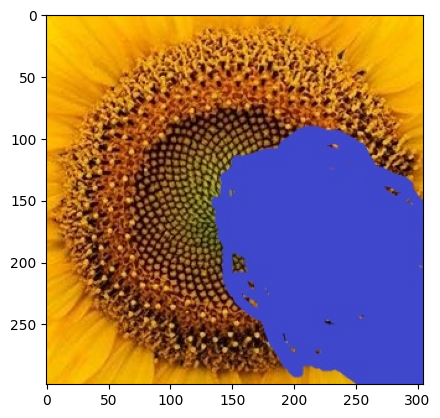

LOLZ [[-0.02293176 -0.02209882 -0.02123993 ... -0.06384769 -0.06317733
  -0.06242961]
 [-0.02278589 -0.02196185 -0.02108056 ... -0.06452231 -0.063876
  -0.06314135]
 [-0.0225976  -0.02177043 -0.02088138 ... -0.06522916 -0.06458203
  -0.06385348]
 ...
 [-0.11174045 -0.11274479 -0.11379665 ... -0.0671839  -0.06667516
  -0.0662185 ]
 [-0.11175075 -0.11280177 -0.11390627 ... -0.06755683 -0.0670077
  -0.06651648]
 [-0.11177069 -0.1128751  -0.11402875 ... -0.0678615  -0.06728009
  -0.06676024]]
LMAOZ -0.16033098101615906 0.2189728319644928 (192, 185)


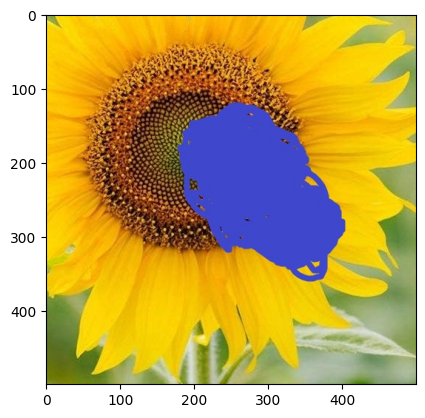

Total Pixels: 91195.00
Blue Pixels: 27752.00
Red Pixels: 63318.00
Green Pixels: 125.00
Percentage of blue content: 30.43%
Percentage of red content: 69.43%
Percentage of green content: 0.14%


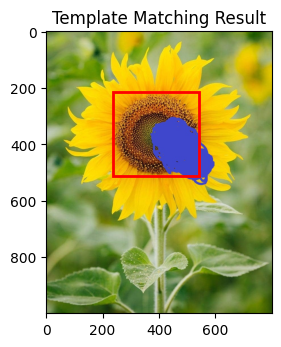

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the main image and template image


config = {
    "main_image_path": 'half_cover.jpeg',  # Use the uploaded image as the main image
    "template_image_path": 'template2.jpeg',  # Replace with the actual template path
    "change_in_blue_thresthold": 3,
    "sunflower_template": 'flower_template.jpeg'
}


def round_to_rgb(pixel):
    r, g, b = pixel
    if r > g and r > b:
        return [255, 0, 0]  # Red
    elif g > r and g > b:
        return [0, 255, 0]  # Green
    elif b > r and b > g:
        return [0, 0, 255]  # Blue
    else:
        if g >= r and g >= b:
            return [0, 255, 0]
        elif r >= g and r >= b:
            return [255, 0, 0]
        else:
            return [0, 0, 255]



def get_box(main_image_path, template_image_path):
    main_image = cv2.imread(main_image_path)
    template_image = cv2.imread(template_image_path)

    if main_image is None:
        raise ValueError(f"Could not load the main image from path: {main_image_path}")
    if template_image is None:
        raise ValueError(f"Could not load the template image from path: {template_image_path}")

    # Perform template matching
    method = cv2.TM_CCOEFF_NORMED
    result = cv2.matchTemplate(main_image, template_image, method)
    print("LOLZ", result)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    print("LMAOZ", min_val, max_val, max_loc)

    # Define the bounding box around the matched region
    top_left = max_loc
    bottom_right = (top_left[0] + template_image.shape[1], top_left[1] + template_image.shape[0])



    # Function to round pixel values to the closest primary color
    def round_to_rgb(pixel):
        r, g, b = pixel
        if r > g and r > b:
            return [255, 0, 0]  # Red
        elif g > r and g > b:
            return [0, 255, 0]  # Green
        elif b > r and b > g:
            return [0, 0, 255]  # Blue
        else:
            # For cases where colors are equal or very close, prioritize green > red > blue
            if g >= r and g >= b:
                return [0, 255, 0]
            elif r >= g and r >= b:
                return [255, 0, 0]
            else:
                return [0, 0, 255]

    isolated_pixels = main_image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
    
    return main_image, isolated_pixels, top_left, bottom_right[0] - top_left[0],  bottom_right[1] - top_left[1]


def give_pixel_percentage(main_image):

    # Apply the rounding function to the isolated pixels
    rounded_pixels = np.apply_along_axis(round_to_rgb, 2, main_image).astype(np.uint8)

    # Calculate the percentage of blue, red, and green content
    total_pixels = rounded_pixels.shape[0] * rounded_pixels.shape[1]
    blue_pixels = np.sum(np.all(rounded_pixels == [255, 0, 0], axis=2))
    red_pixels = np.sum(np.all(rounded_pixels == [0, 0, 255], axis=2))
    green_pixels = np.sum(np.all(rounded_pixels == [0, 255, 0], axis=2))

    blue_percentage = (blue_pixels / total_pixels) * 100 if total_pixels != 0 else 0
    red_percentage = (red_pixels / total_pixels) * 100 if total_pixels != 0 else 0
    green_percentage = (green_pixels / total_pixels) * 100 if total_pixels != 0 else 0

    # Print the percentage of each color for debugging
    print(f"Total Pixels: {total_pixels:.2f}")
    print(f"Blue Pixels: {blue_pixels:.2f}")
    print(f"Red Pixels: {red_pixels:.2f}")
    print(f"Green Pixels: {green_pixels:.2f}")

    print(f"Percentage of blue content: {blue_percentage:.2f}%")
    print(f"Percentage of red content: {red_percentage:.2f}%")
    print(f"Percentage of green content: {green_percentage:.2f}%")

    return total_pixels, blue_percentage, red_percentage, green_percentage


def change_in_blue(ratio_first_picture, ratio_current):
    if ( ratio_current["blue"] / ratio_first_picture["blue"] ) > config["change_in_blue_thresthold"]:
        return True
    else: return False


## TODO
#def cordinates_from_lower_left_width_and_height(lower_left, width, height):
    #upper_left = (lower_left[0] + height), (lower_left)


main_image, isolated_pixels, anther_lower_left, anther_width, anther_height = get_box(config["main_image_path"], config["template_image_path"])
plt.imshow(cv2.cvtColor(isolated_pixels, cv2.COLOR_BGR2RGB))
plt.show()


sunflower_main_image, sunflower_isolated_pixels, flower_lower_left, sunflower_width, sunflower_height = get_box(config["main_image_path"], config["sunflower_template"])
plt.imshow(cv2.cvtColor(sunflower_isolated_pixels, cv2.COLOR_BGR2RGB))
plt.show()



total_pixels, blue_percentage, red_percentage, green_percentage = give_pixel_percentage(isolated_pixels)

## for low detection accuracy, pls use 2 templates to improve accuracy

## ratio is defined like this:
ratio = {"blue": blue_percentage, "non-blue": red_percentage+green_percentage}
## basically, after first detection, log ratio value and at each point in time log ratio value... then run change_in_blue, if new blue percent / first blue percent is more than a threshold, ie blue has signficantly increased: we say blue is detected



# Display the result
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB))
plt.gca().add_patch(plt.Rectangle(anther_lower_left, anther_width, anther_height, edgecolor='red', facecolor='none', linewidth=2))
plt.title("Template Matching Result")



plt.show()


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

main_image_path = 'wide_1.jpg'
template_image_path = 'flower_template.jpeg'

main_image = cv2.imread(main_image_path)
template_image = cv2.imread(template_image_path)

if main_image is None:
    raise ValueError(f"Could not load the main image from path: {main_image_path}")
if template_image is None:
    raise ValueError(f"Could not load the template image from path: {template_image_path}")

scale_percent = 50
width = int(main_image.shape[1] * scale_percent / 100)
height = int(main_image.shape[0] * scale_percent / 100)
dim = (width, height)

resized_main_image = cv2.resize(main_image, dim, interpolation=cv2.INTER_AREA)
resized_template_image = cv2.resize(template_image, (int(template_image.shape[1] * scale_percent / 100), int(template_image.shape[0] * scale_percent / 100)), interpolation=cv2.INTER_AREA)

main_gray = cv2.cvtColor(resized_main_image, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(resized_template_image, cv2.COLOR_BGR2GRAY)

method = cv2.TM_CCOEFF_NORMED
result = cv2.matchTemplate(main_gray, template_gray, method)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

top_left = max_loc
bottom_right = (top_left[0] + resized_template_image.shape[1], top_left[1] + resized_template_image.shape[0])
cv2.rectangle(resized_main_image, top_left, bottom_right, (0, 255, 0), 2)

isolated_pixels = resized_main_image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]

if isolated_pixels.size == 0:
    raise ValueError("Isolated pixels region is empty. Check the bounding box coordinates.")


# Display the result
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(resized_main_image, cv2.COLOR_BGR2RGB))
plt.gca().add_patch(plt.Rectangle(top_left, bottom_right[0]-top_left[0], bottom_right[1]-top_left[1], edgecolor='red', facecolor='none', linewidth=2))
plt.title("Template Matching Result")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rounded_pixels, cv2.COLOR_BGR2RGB))
plt.title("Isolated and Rounded Pixels")

plt.show()